In [101]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import spectral_cube
from utils_z0mgs_images import deproject
from scipy.ndimage import median_filter
import matplotlib.cm as cm

In [130]:
sed_hdr = fits.open('../../test_data/spherex/m33/m33_spherex_seds.fits')[0].header
    
ra = 23.638
dec = 30.785
ngc604_coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
rad = 30./3600.

rgrid, tgrid = deproject(center_coord=ngc604_coord, template_header=sed_hdr)
mask = (rgrid <= rad)
mask.shape

(601, 601)

In [131]:
m33_dir = '../../test_data/spherex/m33/'

lam = fits.open('../../test_data/spherex/m33/m33_spherex_seds_lam.fits')[0].data
bw = fits.open('../../test_data/spherex/m33/m33_spherex_seds_bw.fits')[0].data
sed = fits.open('../../test_data/spherex/m33/m33_spherex_seds.fits')[0].data
smooth = fits.open('../../test_data/spherex/m33/m33_spherex_seds_smooth.fits')[0].data

for zz in range((lam.shape)[0]):
    lam_plane = lam[zz,:,:]
    bw_plane = bw[zz,:,:]
    sed_plane = sed[zz,:,:]
    smooth_plane = smooth[zz,:,:]

    lam_plane[mask == False] = np.nan
    bw_plane[mask == False] = np.nan
    sed_plane[mask == False] = np.nan
    smooth_plane[mask == False] = np.nan

    lam[zz,:,:] = lam_plane
    bw[zz,:,:] = bw_plane
    sed[zz,:,:] = sed_plane
    smooth[zz,:,:] = smooth_plane

lam = np.nanmean(lam, axis=(1,2))
bw = np.nanmean(bw, axis=(1,2))
sed = np.nanmean(sed, axis=(1,2))
smooth = np.nanmean(smooth, axis=(1,2))

/home/leroy.42/tmp/ipykernel_152614/3821154221.py:24: RuntimeWarning: Mean of empty slice
  lam = np.nanmean(lam, axis=(1,2))
/home/leroy.42/tmp/ipykernel_152614/3821154221.py:25: RuntimeWarning: Mean of empty slice
  bw = np.nanmean(bw, axis=(1,2))
/home/leroy.42/tmp/ipykernel_152614/3821154221.py:26: RuntimeWarning: Mean of empty slice
  sed = np.nanmean(sed, axis=(1,2))
/home/leroy.42/tmp/ipykernel_152614/3821154221.py:27: RuntimeWarning: Mean of empty slice
  smooth = np.nanmean(smooth, axis=(1,2))


In [132]:
cube = spectral_cube.SpectralCube.read('../../test_data/spherex/m33/m33_spherex_cube.fits')
cube_lam = cube.spectral_axis
cube.allow_huge_operations = True
cube_spec = cube.with_mask(mask).mean(axis=(1,2))

/home/leroy.42/anaconda3/envs/aklsci/lib/python3.12/site-packages/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


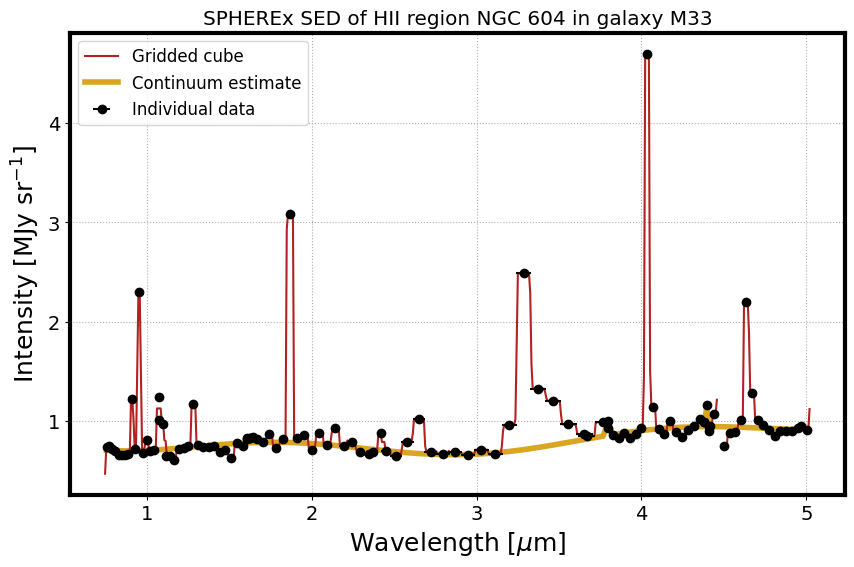

In [134]:
# Set rcParams
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 12           # Global default font size
plt.rcParams['axes.labelsize'] = 18      # Axis label font size
plt.rcParams['xtick.labelsize'] = 14     # X-tick label font size
plt.rcParams['ytick.labelsize'] = 14     # Y-tick label font size

plt.figure(figsize=(10, 6))
plt.grid(linestyle='dotted')
plt.errorbar(lam, sed, xerr=bw/2., fmt='o',
             color='black',
             lw=1.5, label=r'Individual data', zorder=4)
plt.plot(cube_lam, cube_spec, color=r'firebrick', zorder=3, label=r'Gridded cube')
sort_ind= np.argsort(lam)
plt.plot(lam[sort_ind], smooth[sort_ind], color=r'goldenrod', 
         zorder=2, linewidth=4, label=r'Continuum estimate')
plt.yscale('linear')
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel(r'Intensity [MJy sr$^{-1}$]')
plt.title(r'SPHEREx SED of HII region NGC 604 in galaxy M33')
plt.legend(loc='upper left')

plt.savefig('../../plots/prop_spherex_ngc604.png')

/home/leroy.42/tmp/ipykernel_152614/3443422347.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('plasma', len(gal_list))
/home/leroy.42/anaconda3/envs/aklsci/lib/python3.12/site-packages/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,
/home/leroy.42/anaconda3/envs/aklsci/lib/python3.12/site-packages/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,
/home/leroy.42/anaconda3/envs/aklsci/lib/python3.12/site-packages/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,
/home/leroy.42/anaconda3/envs/aklsci/lib/python3.12/site-packages/spectral_cube/spectral_cube.py:440: RuntimeWar

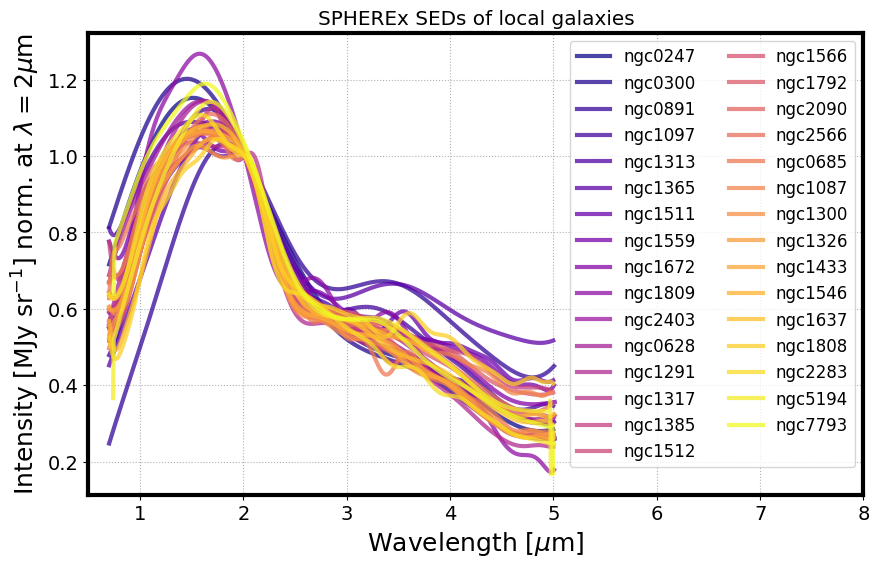

In [150]:
# Set rcParams
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 12           # Global default font size
plt.rcParams['axes.labelsize'] = 18      # Axis label font size
plt.rcParams['xtick.labelsize'] = 14     # X-tick label font size
plt.rcParams['ytick.labelsize'] = 14     # Y-tick label font size

plt.figure(figsize=(10, 6))
plt.grid(linestyle='dotted')

gal_list = ['ngc0247','ngc0300','ngc0891','ngc1097','ngc1313','ngc1365','ngc1511','ngc1559','ngc1672','ngc1809','ngc2403',
            'ngc0628', 'ngc1291', 'ngc1317', 'ngc1385', 'ngc1512', 'ngc1566', 'ngc1792', 'ngc2090', 'ngc2566',
            'ngc0685', 'ngc1087', 'ngc1300', 'ngc1326','ngc1433','ngc1546','ngc1637','ngc1808','ngc2283','ngc5194','ngc7793']

colors = cm.get_cmap('plasma', len(gal_list))

for ii, this_gal in enumerate(gal_list):

    #lam = fits.open('../../test_data/spherex/'+this_gal+'/'+this_gal+'_spherex_seds_lam.fits')[0].data
    #bw = fits.open('../../test_data/spherex/'+this_gal+'/'+this_gal+'_spherex_seds_bw.fits')[0].data
    #sed = fits.open('../../test_data/spherex/'+this_gal+'/'+this_gal+'_spherex_seds.fits')[0].data
    #smooth = fits.open('../../test_data/spherex/'+this_gal+'/'+this_gal+'_spherex_seds_smooth.fits')[0].data
    cube = spectral_cube.SpectralCube.read('../../test_data/spherex/'+this_gal+'/'+this_gal+'_spherex_cube_smooth.fits')
    
    nz, ny, nx = cube.shape    
    lam = cube.spectral_axis
    #spec = (cube.filled_data[:,ny // 2, nx // 2])

    xlo = ylo = nx // 2 - 25
    xhi = yhi = nx // 2 + 25
    spec = cube[:,ylo:yhi,xlo:xhi].mean(axis=(1,2))
    
    #nz, ny, nx = lam.shape
    #lam = lam[:, ny//2, nx//2]
    #spec = smooth[:,ny//2,nx//2]
    #sortind = np.argsort(lam)
    #lam = lam[sortind]
    #spec = spec[sortind]

    #ind = (lam > 1.05*u.um)*(lam < 1.15*u.um)
    #lam[ind] = np.nan
    #spec[ind] = np.nan
    
    ind = np.isfinite(spec)*np.isfinite(lam)
    lam = lam[ind]
    spec = spec[ind]

    #spec = median_filter(spec, size=3)   
    
    plt.plot(lam, spec/spec[175], label=this_gal, color=colors(ii), linewidth=3, alpha=0.75)
    #plt.scatter(lam, spec/spec[175], label=this_gal, color=colors(ii), marker='o', s=10)
    #plt.plot(lam, spec, label=this_gal)

plt.xlim(0.5,8)
plt.yscale('linear')
plt.legend(loc='upper right', ncol=2)

plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel(r'Intensity [MJy sr$^{-1}$] norm. at $\lambda = 2\mu$m')
plt.title(r'SPHEREx SEDs of local galaxies')

plt.savefig('../../plots/prop_spherex_smoothseds.png')
    